# Описание проекта 

Развлекательное приложения Procrastinate Pro+, несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.

Задача — разобраться в причинах и помочь компании выйти в плюс.

Необходимо изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

In [1]:
#Загрузим библиотеки

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import numpy as np

In [5]:
from matplotlib import pyplot as plt

In [6]:
from datetime import date, datetime, timedelta

Загрузим данные из csv-файлов

In [7]:
#Визиты (информация о посещениях сайта)
visits = pd.read_csv('/datasets/visits_info_short.csv')

In [8]:
#Заказы (информация о заказах)
orders = pd.read_csv('/datasets/orders_info_short.csv')

In [9]:
#Расходы (информация о расходах на рекламу)
costs = pd.read_csv('/datasets/costs_info_short.csv')

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Для подгрузки данных можно использовать конструкцию `try-except`, она поможет избежать потенциальных ошибок при загрузке данных, связанных, например, с некорректным указанием путей.
        
Подробнее о конструкции по ссылке:
        
https://pythonworld.ru/tipy-dannyx-v-python/isklyucheniya-v-python-konstrukciya-try-except-dlya-obrabotki-isklyuchenij.html
        
Несколько интересных статей кейсы использования конструкции:
    
https://www.programiz.com/python-programming/exception-handling
    
https://towardsdatascience.com/do-not-abuse-try-except-in-python-d9b8ee59e23b
    
https://www.techbeamers.com/use-try-except-python/
        
Как вариант в try можно указать корректные пути (в нашем случае глобальные) в except - некорректные (локальные). Можно также специфицровать тип ошибки, FileNotFoundError или задать кастомный тип ошибки (FilePathError, например)
        
Она полезна, если ты работаешь локально, а потом подгружаешь проект на платформу. Конструкция позволит не падать коду и локально, и на сервере ЯП, так как если не сработает один блок с путями, сработает другой.
        
Либо же можно использовать стандартную библиотеку os:
        
https://pythonworld.ru/moduli/modul-os.html
        
Пример функции для подгрузки данных с использованием библиотеки os:
        
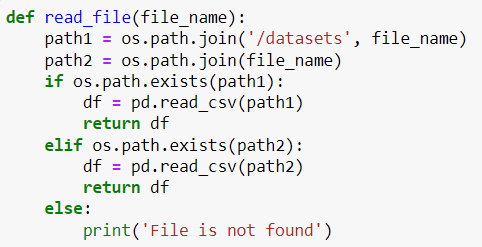

<p>
<div class="alert-info">
<b>Комментарий студента</b>

Cпасибо за совет, буду знать!</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера: вторая итерация ревью <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
</div>


In [10]:
#Необходимо изучить данные и выполнить предобработку
#Выведем первые 20 строчек для каждой датафрейма
visits.head(20)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [11]:
orders.head(20)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


In [12]:
costs.head(20)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


In [13]:
#Теперь выведем общую информацию

In [14]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [16]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [17]:
#заменим пробелы на нижнее подчеркивание в названиях колонок
visits = visits.rename(columns=lambda col: col.replace(" ", "_"))
visits

,User_Id,Region,Device,Channel,Session_Start,Session_End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


In [18]:
orders = orders.rename(columns=lambda col: col.replace(" ", "_"))
orders

,User_Id,Event_Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


Необходимо поработать с данными:

   1. Привести к нижнему регистру названия колонок (видно, что некоторые названия колонок с большой, некоторые с маленькой);
   
   2. Проверить на дубликаты;
    
   3. Поменять тип данных (преобразовать в формат даты);
    
   4. Убрать пропуски ,если они есть
    
   5.Заменить пробелы на нижнее подчеркивание в названия колонок

In [19]:
#Необходимо привести названия колонок к нижнему регистру
visits.columns = map(str.lower, visits.columns)
orders.columns = map(str.lower, orders.columns)
costs.columns = map(str.lower, costs.columns)

In [20]:
#Проверим на дубликаты
print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())

0
0
0


Видим, что необходимо поменять тип данных в следующих колонках (в колонках со временем неподходящий тип данных, необходим поменять на datetime):

In [21]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

Промежуточный вывод: Загрузили данные из csv-файлов, изучили их, привели к нижнему регистру названия колонок, проверили на дубликаты, преобразовали в нужных колонках формат (в формат даты).

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [22]:
#Необходимо вычислить значения следующих метрик - Retention Rate,конверсия,LTV
#установим момент анализа
observation_date = datetime(2019, 11, 1).date()
#установим горизонт анализа - 2 недели
horizon_days = 14 

In [23]:
#создаем функицю для создания профилей пользователей
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

In [24]:
#создаем функицю для подсчёта Retention Rate
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

In [25]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [26]:
def get_ltv(
    profiles,  # Получаем профили и данные о покупках
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Добавляем данные о покупках в профили

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    # Рассчитаем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Построим таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # Посчитаем сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # Вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Объединияем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Посчитаем LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [27]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Таким образом задали функции для расчёта и анализа LTV, ROI, удержания и конверсии.

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

Составим профили пользователей и определим минимальную и максимальную даты привлечения пользователей

In [28]:
def get_profiles(sessions, orders, ad_costs):

    #необходимо найти параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
#определим дату первого посещения и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [29]:
profiles = get_profiles(visits, orders, costs)
profiles['dt'] = profiles['first_ts'].dt.date
profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max() 

In [30]:
#Выведем дату минимального привлечения пользователей
min_analysis_date

Timestamp('2019-05-01 00:00:00')

In [31]:
#Выведем дату максимального привлечения пользователей
observation_date


Timestamp('2019-10-27 00:00:00')

In [32]:
#Выведем дату максимального и минимального привлечения пользователей
print('Минимальная дата привлечения',min_analysis_date.strftime('%Y-%m-%d'))
print('Максимальная дата привлечения',observation_date.strftime('%Y-%m-%d'))

Минимальная дата привлечения 2019-05-01
Максимальная дата привлечения 2019-10-27


Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны

In [33]:
#Необходимо посмотреть датафрейм visits столбец 'region'
#посмотрим уникальные значения в столбце
visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

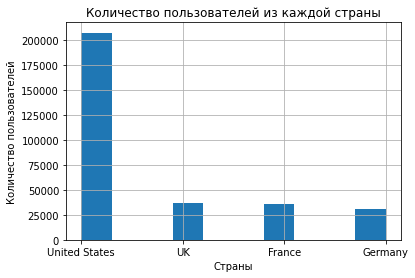

In [34]:
#построим график для наглядности
visits['region'].hist()
plt.xlabel('Страны')
plt.ylabel('Количество пользователей')
plt.title('Количество пользователей из каждой страны')
plt.show()

Видим, что больше всего пользователей из United States, в UK и France, приблизительно одинаковое количество пользователей, а в  Germany меньше всего пользователей

In [35]:
reg_user_share = pd.DataFrame()
reg_user_share['users_cnt'] = profiles.groupby('region')['user_id'].count()
reg_user_share['payer_users_cnt'] = profiles.query('payer == True').groupby('region')['user_id'].count()
reg_user_share['share'] = 100*(reg_user_share['payer_users_cnt'] /reg_user_share['users_cnt'])
reg_user_share.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'})

,users_cnt,payer_users_cnt,share
region,,,
United States,100002,6902,6.9%
Germany,14981,616,4.1%
UK,17575,700,4.0%
France,17450,663,3.8%


Видим, что наибольшая доля платящий пользователей составляет 6.9% и это пользователи из United States, а наименьшая доля 3.8% и это пользователи из France

Теперь узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [36]:
profiles['device'].value_counts()

iPhone     54479
Android    35032
PC         30455
Mac        30042
Name: device, dtype: int64

Девайсы пользователей представлены мобильными телефонами на двух платформах - iPhone и Android и ПК 
на PC и Mac

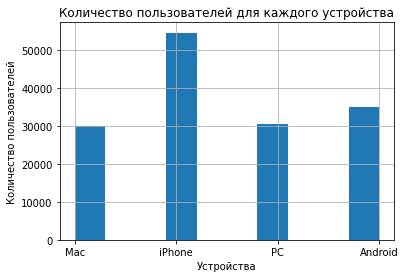

In [37]:
profiles['device'].hist()
plt.xlabel('Устройства')
plt.ylabel('Количество пользователей')
plt.title('Количество пользователей для каждого устройства')
plt.show()

Видим, что больше всего пользователей iPhone и Android, а меньше всего PC и Mac, можно сделать вывод,что большая часть пользователей заходят в развлекательно приложение через мобильные телефоны.

In [38]:
#аналогично предыдущему шагу построим таблицу
dev_user_share = pd.DataFrame()
dev_user_share['users_cnt'] = profiles.groupby('device')['user_id'].count()
dev_user_share['payer_users_cnt'] = profiles.query('payer == True').groupby('device')['user_id'].count()
dev_user_share['share'] = 100*(dev_user_share['payer_users_cnt'] / dev_user_share['users_cnt'])
dev_user_share.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'})

,users_cnt,payer_users_cnt,share
device,,,
Mac,30042,1912,6.4%
iPhone,54479,3382,6.2%
Android,35032,2050,5.9%
PC,30455,1537,5.0%


Видим, что большинство платящих пользователей пользуются Mac и менее всего PC.

Теперь изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [39]:
profiles['channel'].value_counts()

organic               56439
FaceBoom              29144
TipTop                19561
OppleCreativeMedia     8605
WahooNetBanner         8553
LeapBob                8553
RocketSuperAds         4448
MediaTornado           4364
YRabbit                4312
AdNonSense             3880
lambdaMediaAds         2149
Name: channel, dtype: int64

У нас представлено 11 каналов для привлечения, среди них топ - 3 самых часто используемых для привлечения -  это organic,FaceBoom,TipTop

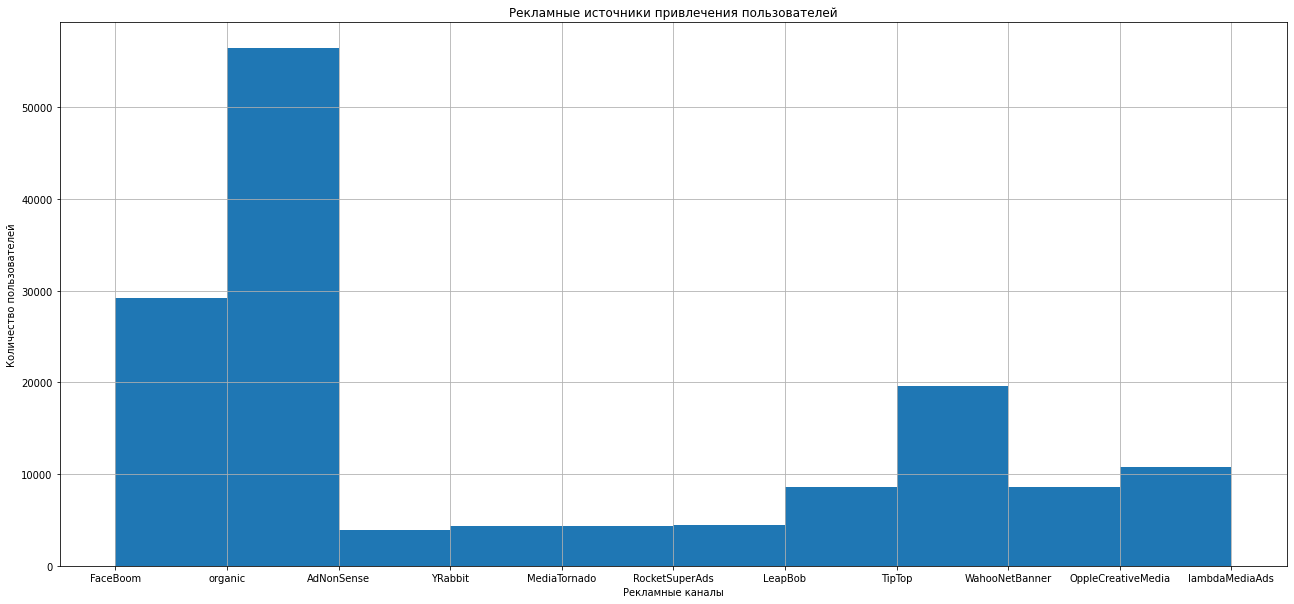

In [40]:
profiles['channel'].hist(figsize = (22,10))
plt.xlabel('Рекламные каналы')
plt.ylabel('Количество пользователей')
plt.title('Рекламные источники привлечения пользователей')
plt.show()

In [41]:
channel_user_share = pd.DataFrame()
channel_user_share['users_cnt'] = profiles.groupby('channel')['user_id'].count()
channel_user_share['payer_users_cnt'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
channel_user_share['share'] = 100*(channel_user_share['payer_users_cnt'] / channel_user_share['users_cnt']) 
channel_user_share.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'}).bar(color='#FFA07A', vmin=100_000, subset=['share'], align='zero').bar(color='lightgreen', vmin=0, subset=['share'], align='zero').set_caption('Рекламные каналы')

,users_cnt,payer_users_cnt,share
channel,,,
FaceBoom,29144,3557,12.2%
AdNonSense,3880,440,11.3%
lambdaMediaAds,2149,225,10.5%
TipTop,19561,1878,9.6%
RocketSuperAds,4448,352,7.9%
WahooNetBanner,8553,453,5.3%
YRabbit,4312,165,3.8%
MediaTornado,4364,156,3.6%
LeapBob,8553,262,3.1%


Видим, что из канала FaceBoom пришло больше всего платящих пользователей, а из канала organic меньше всего.

Вывод:

1.Мы составим профили пользователей и определили минимальную и максимальную даты привлечения пользователей:
    
Минимальная дата привлечения пользователей - 1 мая 2019 года

Максимальная дата привлечения пользователей - 27 октября 2019 года

2.Выяснили, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей:

Больше всего пользователей из United States, в UK и France, приблизительно одинаковое количество пользователей, а в  Germany меньше всего пользователей. При этом наибольшая доля платящих пользователей составляет 6.9% и это пользователи из United States, а наименьшая доля 3.8% и это пользователи из France.

3.Узнали, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи:

Девайсы пользователей представлены мобильными телефонами на двух платформах - iPhone и Android и ПК 
на PC и Mac. Больше всего пользователей iPhone и Android, а меньше всего PC и Mac, можно сделать вывод,что большая часть пользователей заходят в развлекательно приложение через мобильные телефоны. Большинство платящих пользователей больше всего пользуются Mac и менее всего PC.

4.Изучили рекламные источники привлечения и определили каналы, из которых пришло больше всего платящих пользователей. 

У нас представлено 11 каналов для привлечения, среди них топ - 3 самых часто используемых для привлечения -  это organic, FaceBoom, TipTop. При этом из канала FaceBoom и AdNonSense пришло больше всего платящих пользователей, а из канала organic меньше всего.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [42]:
#Посчитаем общую сумму расходов на маркетинг

In [43]:
costs['costs'].sum().round()

105497.0

Общая сумма расходов на маркетинг составла 105497

In [44]:
#Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник

In [45]:
channel_costs_report = pd.DataFrame()
channel_costs_report['costs'] = costs.groupby('channel')['costs'].sum()
sum_sales = costs['costs'].sum()
channel_costs_report['%,ratio'] = ((channel_costs_report['costs']/sum_sales) * 100).round(2)
channel_costs_report.sort_values(by='costs', ascending=False)#.style.format({'share': '{:.0f}%', 'payer_share': '{:.2f

,costs,"%,ratio"
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


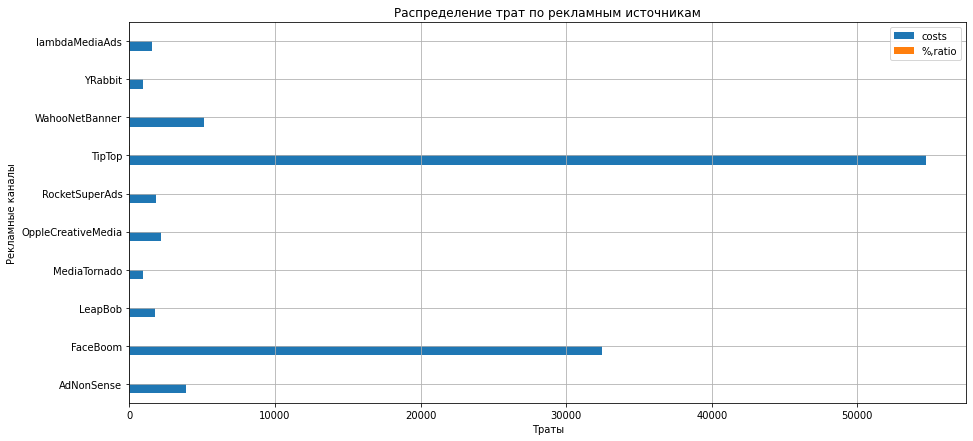

In [46]:
channel_costs_report.plot(figsize=(15,7),kind='barh',grid=True)
plt.xlabel('Траты')
plt.ylabel('Рекламные каналы')
plt.title('Распределение трат по рекламным источникам')
plt.show()

Из графика и таблицы видно, что наибольшее количество денег потратили на канал TipTop и FaceBoom, а наименнее всего было вложено в MediaTornado и YRabbit.

In [47]:
#Построbv визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. 

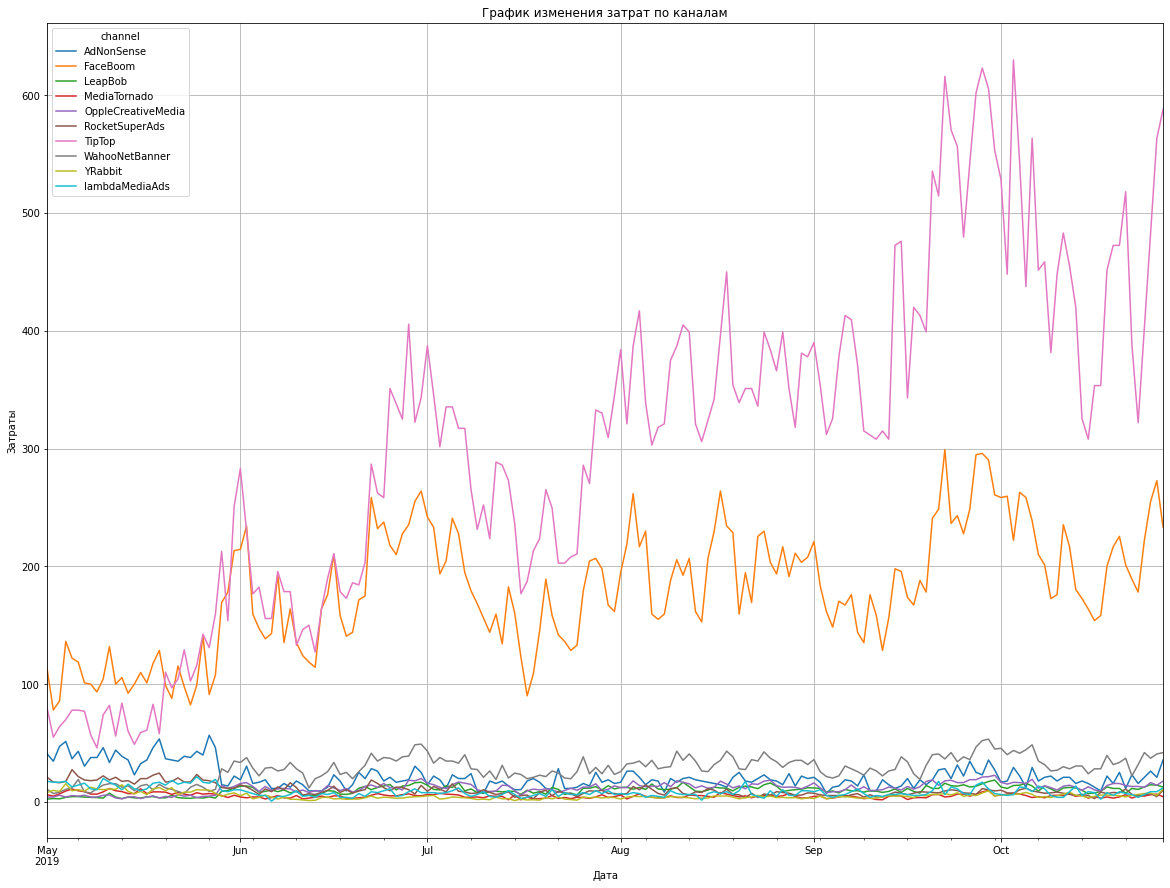

In [48]:
filtered_data = costs.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )
filtered_data.plot(                                             
           figsize=(20, 15),
           grid=True,)

plt.title('График изменения затрат по каналам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

/tmp/ipykernel_149/2295751049.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  costs.pivot_table(index=part,columns='channel',values='costs',aggfunc='sum').plot.area(ax=plt.subplot(1,2,i+1))


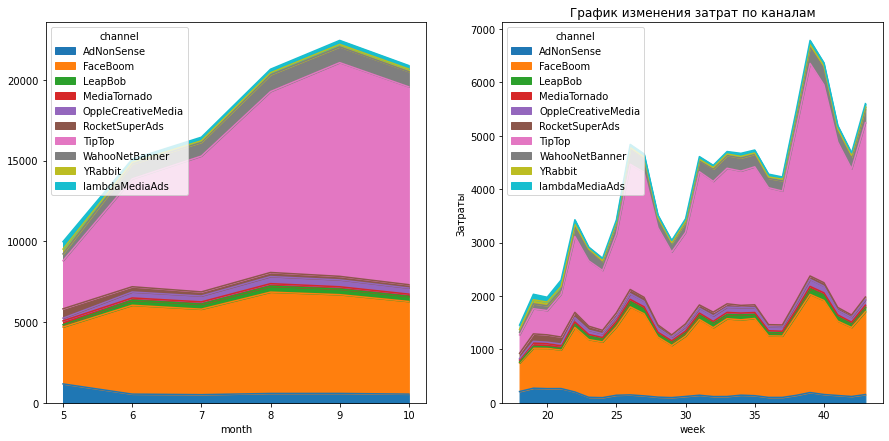

In [49]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.isocalendar().week
dates = [costs['month'],costs['week']]
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
for i,part in enumerate(dates):
    costs.pivot_table(index=part,columns='channel',values='costs',aggfunc='sum').plot.area(ax=plt.subplot(1,2,i+1))
plt.title('График изменения затрат по каналам')
plt.ylabel('Затраты')
plt.show()

Из графиков видно, что затраты на большую часть каналов оставались примерно на одинаковом уровне, затраты на FaceBoom были на одинаково высоком уровне,а вот затраты на TipTop значительно увеличились в рассматриваемый период.

Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника

In [50]:
cac_by_channel = pd.DataFrame()
#уберем профили organic, т.к стоимость их привлечения равна нулю 
profiles = profiles.query('channel != "organic"')
cac_by_channel['acquisition_cost_mean'] = profiles.groupby('channel')['acquisition_cost'].mean()
cac_by_channel.sort_values(by='acquisition_cost_mean', ascending=False).style.format({'acquisition_cost_mean': '{:.2f}'})

,acquisition_cost_mean
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


In [51]:
#Посмотрим, сколько в среднем стоит привлечение одного клиента
profiles['acquisition_cost'].mean()

1.1274813239427588

В среднем стоимость привлечения одного клиента составила 1.1

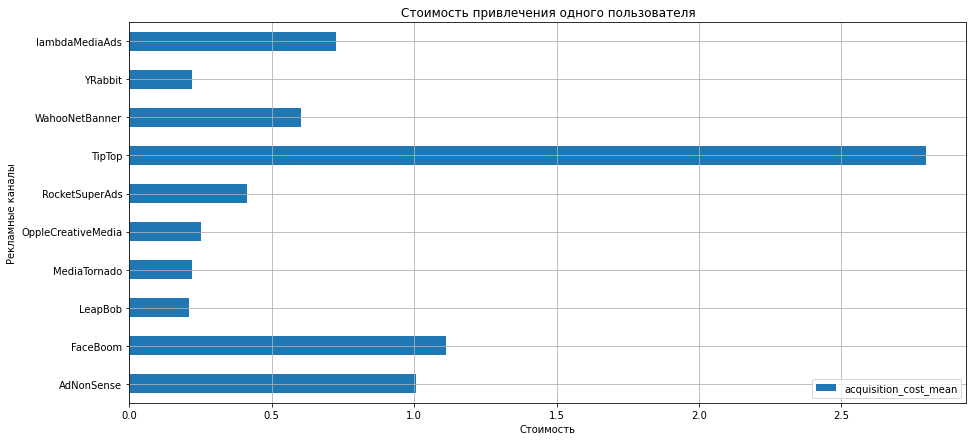

In [52]:
cac_by_channel.plot(figsize=(15,7),kind='barh',grid=True)
plt.xlabel('Стоимость')
plt.ylabel('Рекламные каналы')
plt.title('Стоимость привлечения одного пользователя')
plt.legend(loc='lower right')
plt.show()

Видно из графика и таблицы, что самая дорогая стоимость привлечения одного пользователя из таких каналов как TipTop , FaceBoom и  AdNonSense, а каналами, где стоимость привлечения одного пользователя оказалось минимальной, является YRabbit	,MediaTornado и LeapBob.

Вывод:

1.Посчитали общую сумму расходов на маркетинг

Общая сумма расходов на маркетинг составла 105497

2.Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник:

Наибольшее количество денег потратили на канал TipTop и FaceBoom, а наименнее всего было вложено в MediaTornado и YRabbit.

3.Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику:

Затраты на большую часть каналов оставались примерно на одинаковом уровне, затраты на FaceBoom были на одинаково высоком уровне,а вот затраты на TipTop значительно увеличились в рассматриваемый период.

4.Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника

В среднем стоимость привлечения одного клиента составила 1.1, самая дорогая стоимость привлечения одного пользователя из таких каналов как TipTop , FaceBoom и AdNonSense, а каналами, где стоимость привлечения одного пользователя оказалось минимальной, является YRabbit ,MediaTornado и LeapBob.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [53]:
#Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [54]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [55]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Стоимость привлечения пользователей')

    # кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Уровень окупаемости ROI')

    # динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика окупаемости пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

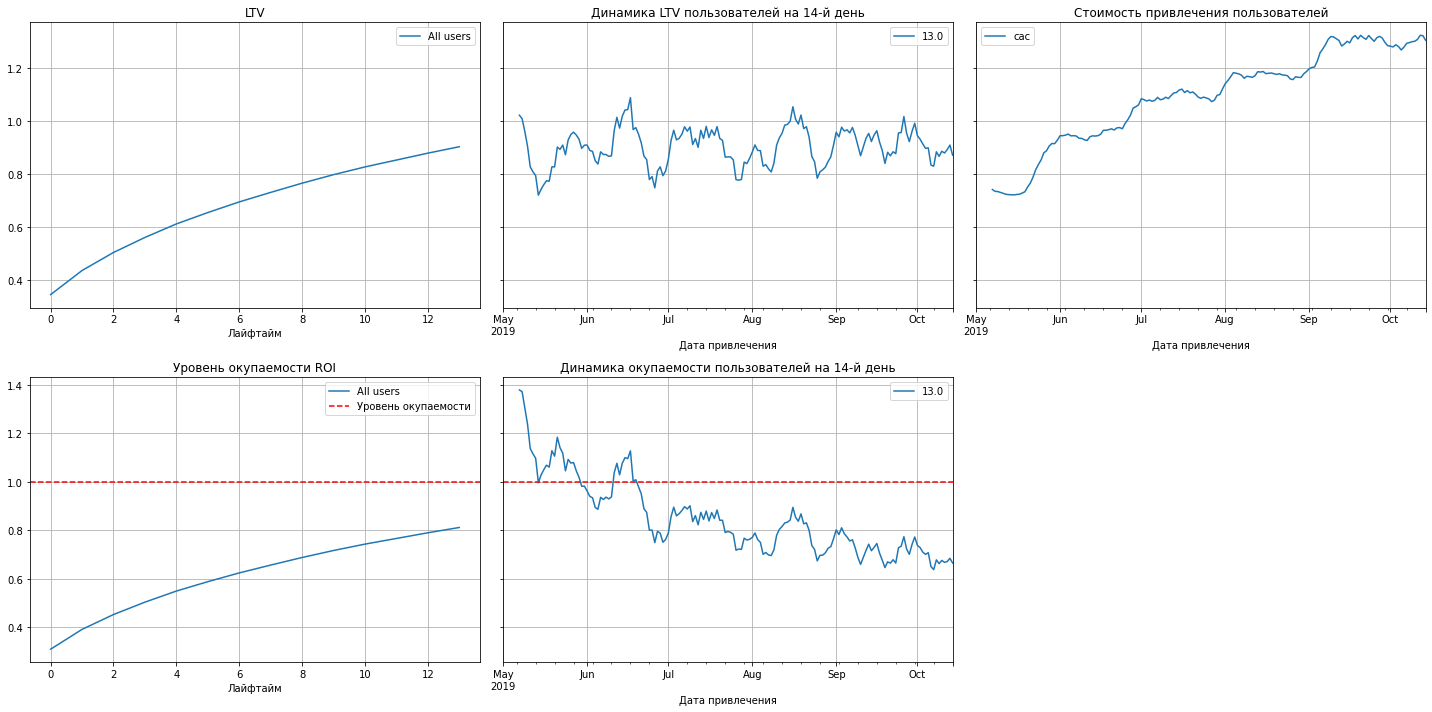

In [56]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 


График 1 - LTV: LTV вырастает на протяжении рассматриваемого периода

График 2 - Динамика LTV: набольшее количество пользователей было привлечено с июня по июль

График 3 - Стоимость привлечения пользователей: стоимость привлечения пользователей увеличивается на протяжении всего рассматриваемого периода

График 4 - Уровень окупаемости ROI: видим, что с начала рассматриваемого периода уровень окупаемости повышается, но так и не доходит до полной окупаемости

График 5 - Динамика окупаемости пользователей: Видим, что начиная с мая окупаемость начинает снижаться и окупаемость пользователей полностью падает в период с июня по июль

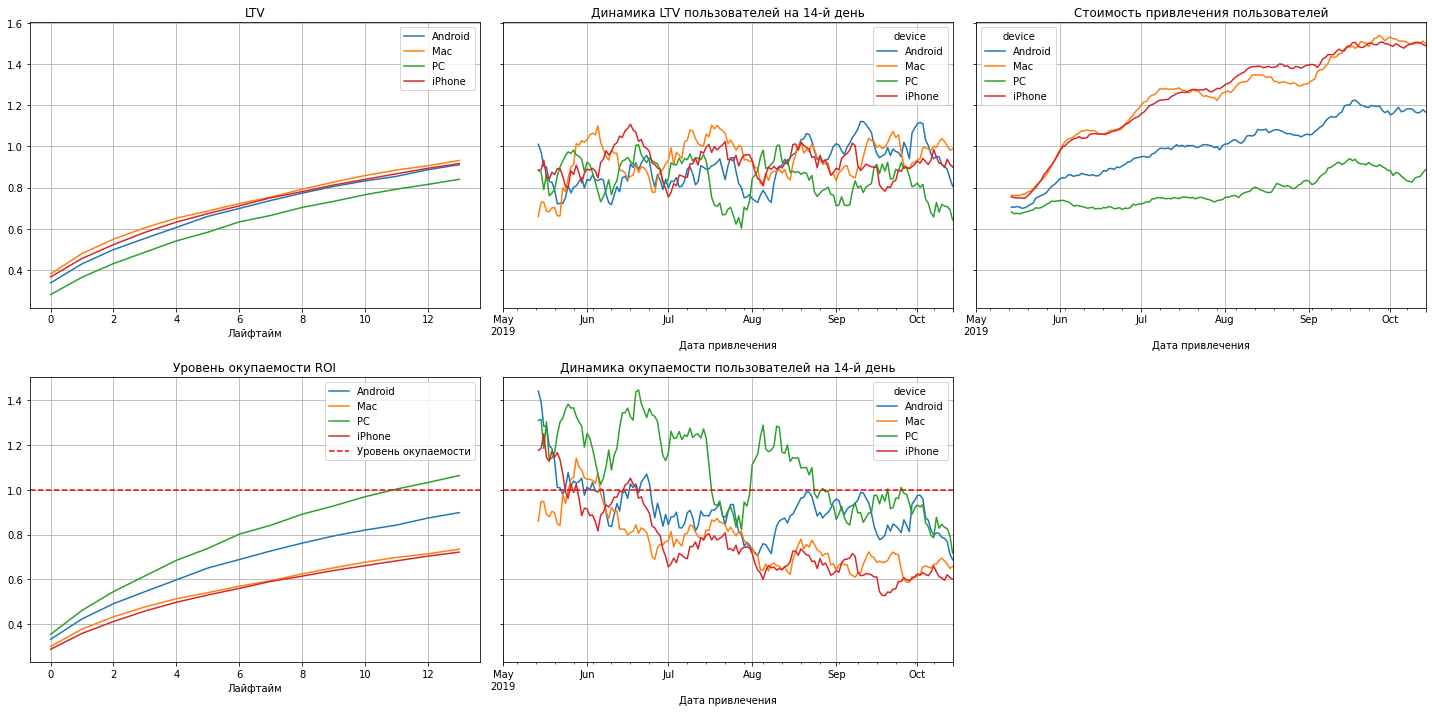

In [57]:
#Проанализируем окупаемость рекламы с разбивкой по устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

График 1 - LTV: видно, что наименьшую сумму денег приносят пользователи на устройстве PC , а наибольшую 
Mac и iphone;

График 2 - Динамика  LTV : в динамике видно, что LTV пользователей на PC понижается на протяжении всего рассматриваемого периода, тогда как LTV пользователей на Mac, android возрастает. LTV пользователей iphone тоже понижалось, но все равно остается одним из самых высоких;

График 3 - Стоимость привлечения пользователей:  видно, что стоимость привлечения пользоваталей на всех платформах возрастает,но стоит отметить, что стоимость привлечения пользователей на PC минимальная, а стоимость привлечения пользователей на mac и ipnone являются максимальными;

График 4 - Уровень окупаемости ROI: окупаемость пользователей на android,mac и iphone не доходит до уровня окупаемости, до уровня окупаемости доходит только окупаемость пользователей на android;

График 5 - График динамики окупаемости ROI: видно, что окупаемость для пользователей на всех платформах снижается на протяжении всего рассматриваемого периода;

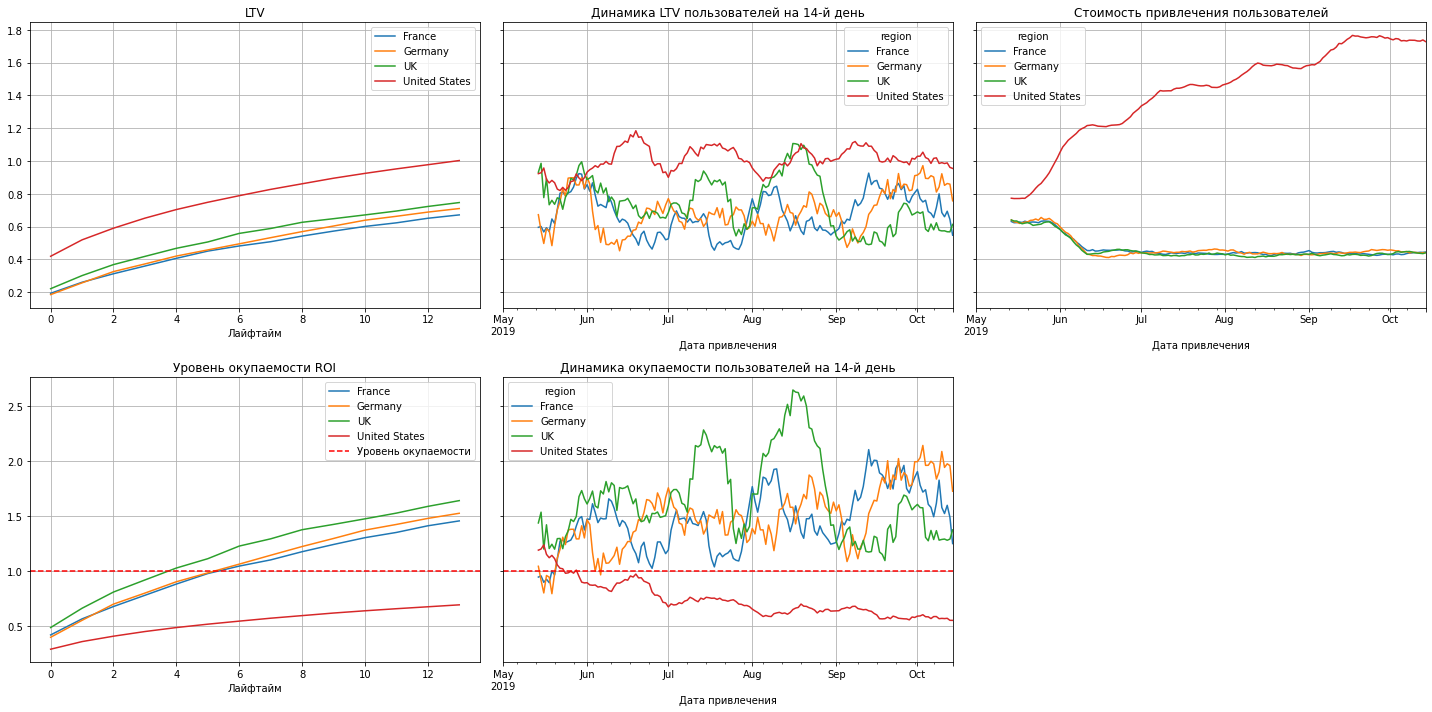

In [58]:
#проанализируем окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

График 1 - LTV: видно, что на протяжении рассматриваемого периода LTV пользователей всех стран растет, саый большой рост наблюдается у пользователей из United States. Самый низкий LTV у пользователей из France, а самый высокий у пользователей из United States;

График 2 - Динамика  LTV : видно, что в динамике LTV у пользователей из Germany наблюдается повышение, а у пользователей из других стран наблюдается уменьшение;

График 3 - Стоимость привлечения пользователей: видно, что стоимость привлечения пользователей из United States увеличилась, а стоимость привлечения пользователей из других стран - уменьшилась;

График 4 - Уровень окупаемости  ROI: видно, окупаемотсь для пользователей всех стран превышает уровень окупаемости, кроме окупаемости United States;

График 5 - Динамика окупаемости пользователей: видно, что окупаемость пользователй из United States понижается на протяжении всего рассматриваемого периода, тогда как окупаемость пользователей из других стран повышается;


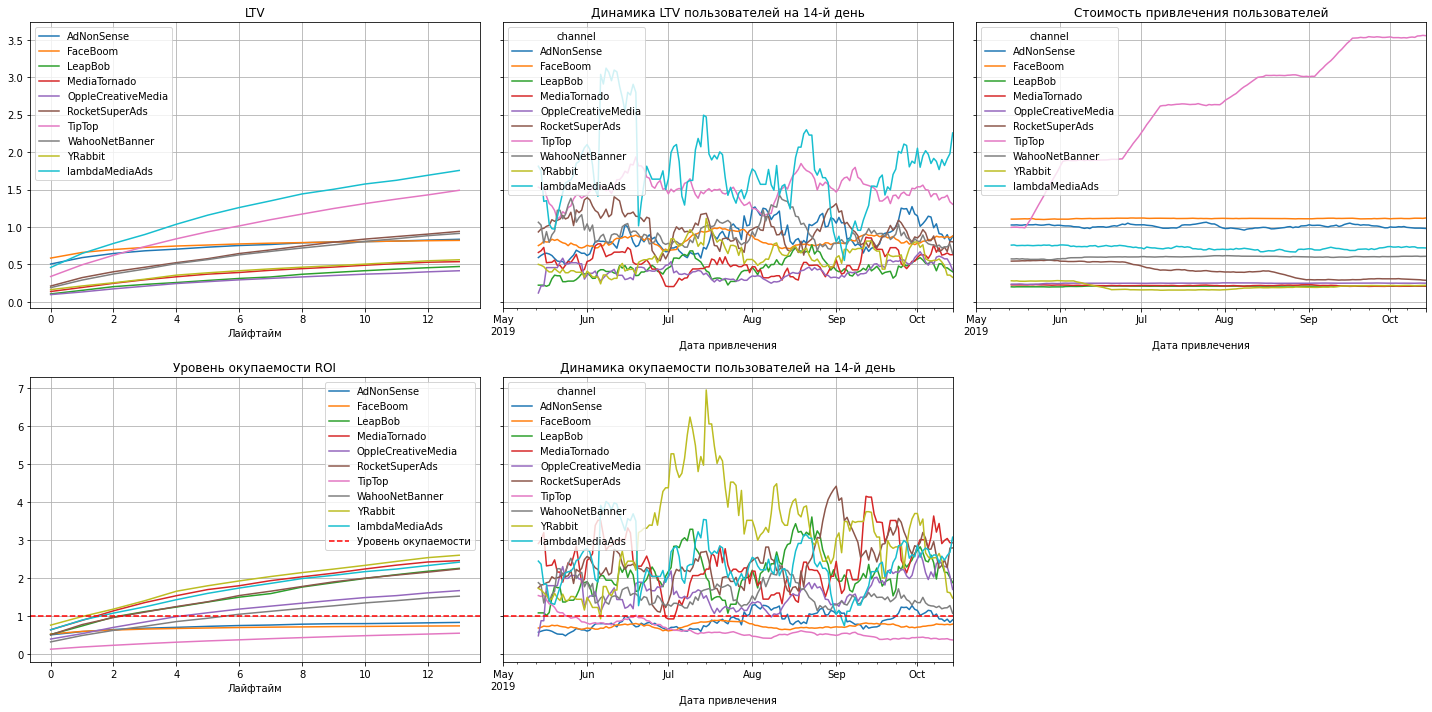

In [59]:
#проанализируем окупаемость с разбивкой по каналам
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

График 1 - LTV: видно, что на протяжении рассматриваемого периода LTV для пользователей из канала lambdaMediaAds возрастает и является максимальной;

График 2 - Динамика  LTV : видно, что в динамике LTV для пользователей из канала lambdaMediaAds возрастает на протяжении всего рассматриваемого периода;

График 3 - Стоимость привлечения пользователей: видно, что наибольшая стоимость привлечения пользователей из канала TipTop;

График 4 - Уровень окупаемости  ROI: окупаемость привлечения пользователей из большинства каналов превышает уровень окупаемости, кроме окупаемости пользователей из каналов TipTop, FaceBoom. AdNonSense;

График 5 - Динамика окупаемости пользователей: видно, что у большинства каналов окупаемость имеет позитивную динамику, отдельно можно выделить канал YRabbit, где с июля по август наблюдается самый высокий пик роста;

In [60]:
#Необходимо изучить конверсию в разрезе каналов рекламы, устройств и стран
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # график кривых конверсий
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # график динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей'.format(horizon))

    plt.tight_layout()
    plt.show() 

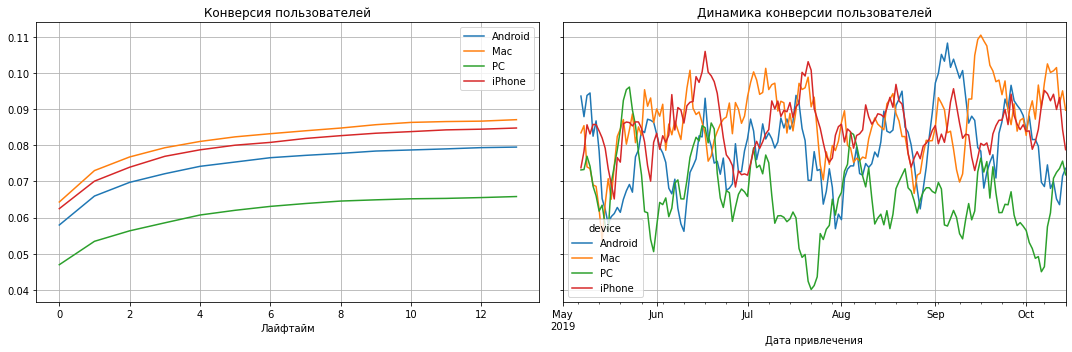

In [61]:
#конверсия по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Из графика видим, что наименьшая конверсия пользователей на PC И Android, а в динамике конверсии пользователей видим, значительное снижение конверсии пользоваетелй PC и Android на проятежнии всего рассматриваемого периода. Также, стоит отметить, что конверсия пользователей Mac возрастала, а пользователей iphone незначительно, но уменьшалась.

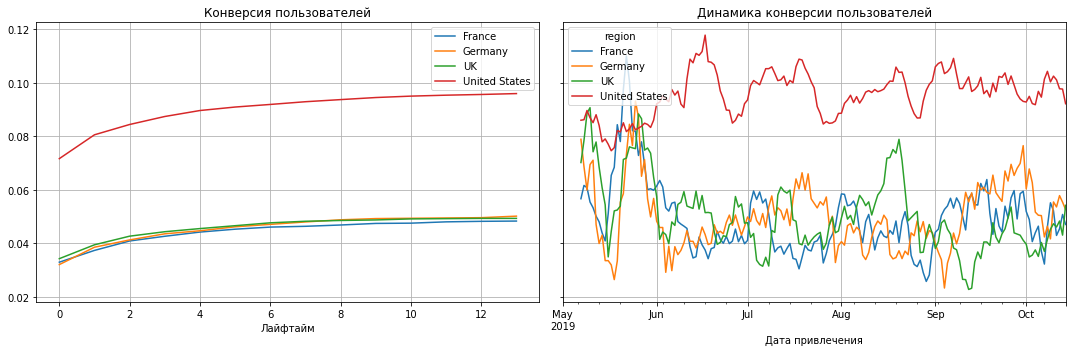

In [62]:
#конверсия по странам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Из графика видим, что самая высокая конверсия у United States, а у остальных рассматриваемых странах конверсия приблизительно на одном уровне. В динамике конверсии пользовоателей видим, увеличение конверсии пользователей из United States и значительное снижение конверсии пользоваетелй из других рассматриваемых стран. Самое большое падение конверсии наблюдается для пользователей из France.

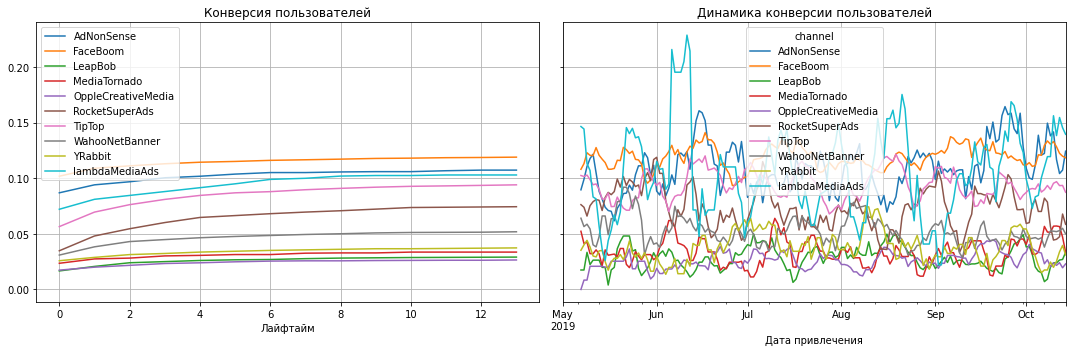

In [63]:
#конверсия по каналам
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)


Из графика видим, что самая высокая конверсия у канала FaceBoom и AdNonSenses, а у остальных рассматриваемых рекламных каналов конверсия заметно ниже. В динамике конверсии пользователей видим, увеличение конверсии по всем рекламным каналам в виде скачков в периоды с июня по июль, с августа по сентябрь и с сентября по октябрь. Возможно, в этит периоды запускалась рекламная кампания по всем рекламным каналам или, возможно, есть другие причины.

In [64]:
#Теперь необходимо определить удержание пользователей
def plot_retention(retention, retention_history, horizon, window=7):

    
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

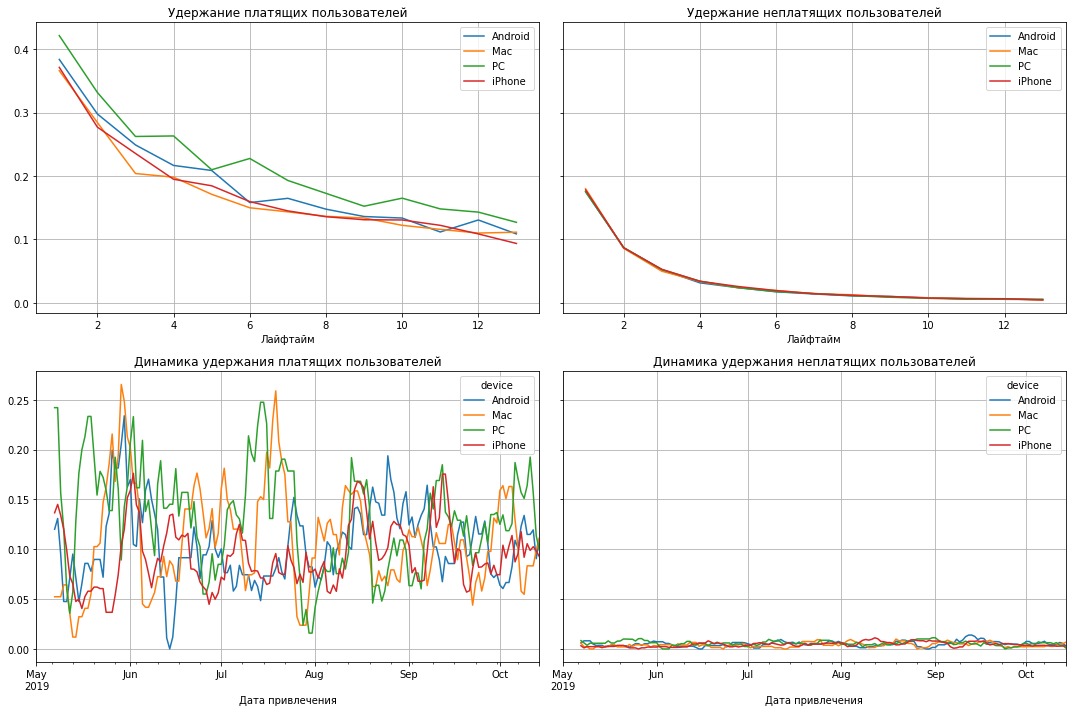

In [65]:
#удержание пользователей по устройствам
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

График 1 - Удержание платящих пользователей: видно, что удержание платящих пользователей падает на протяжении рассматриваемого периода. Стоит отметить, что снижение удержания пользователей PC наблюдается в виде резкого скачкообразного спада, также видно, что самое большое снижение происходит для пользователей Mac;

График 2 - Удержание неплатящих пользователей: видно, что удержание неплатящих пользоваетелей снижается на протяжении всего рассматриваемого периода на всех устройствах;

График 3 - Динамика удержания платящих пользователей: в динамике видно, что удержание платящих пользователей снижается для пользователей на PC. По всем платформам наблюдается увеличение удержания в виде скачков каждый месяц. Стоит отметить сильное снижение удержания пользователей на платформе Android в период с июня по июль;

График 4 - Динамика удержания неплатящих пользователей: видно, что динамика удержания неплатящих пользоваетелей на протяжении всего рассматриваемого периода на всех устройствах приблизительно одинаковая;

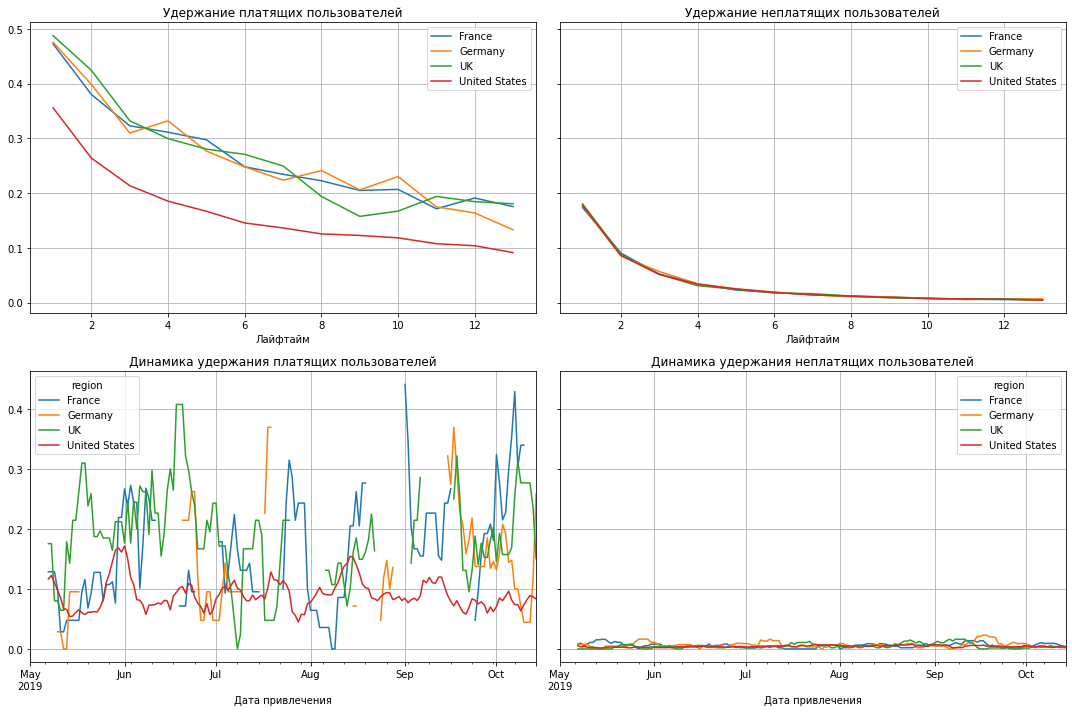

In [66]:
#удержание по странам
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

График 1 - Удержание платящих пользователей:  видно, что удержание платящих пользователей падает на протяжении рассматриваемого периода для всех стран. Самое низкое удержание отмечается для пользователей из United States;

График 2 - Удержание неплатящих пользователей: видно, что удержание неплатящих пользоваетелей снижается на протяжении всего рассматриваемого периода для всех стран;

График 3 - Динамика удержания платящих пользователей: в динамике видно, что удержание платящих пользователей снижается для пользователей из United States. Можно отметить, что увеличивается удержание пользователей из других стран;

График 4 - Динамика удержания неплатящих пользователей:видно, что динамика удержания неплатящих пользоваетелей на протяжении всего рассматриваемого периода для всех стран приблизительно одинаковая;

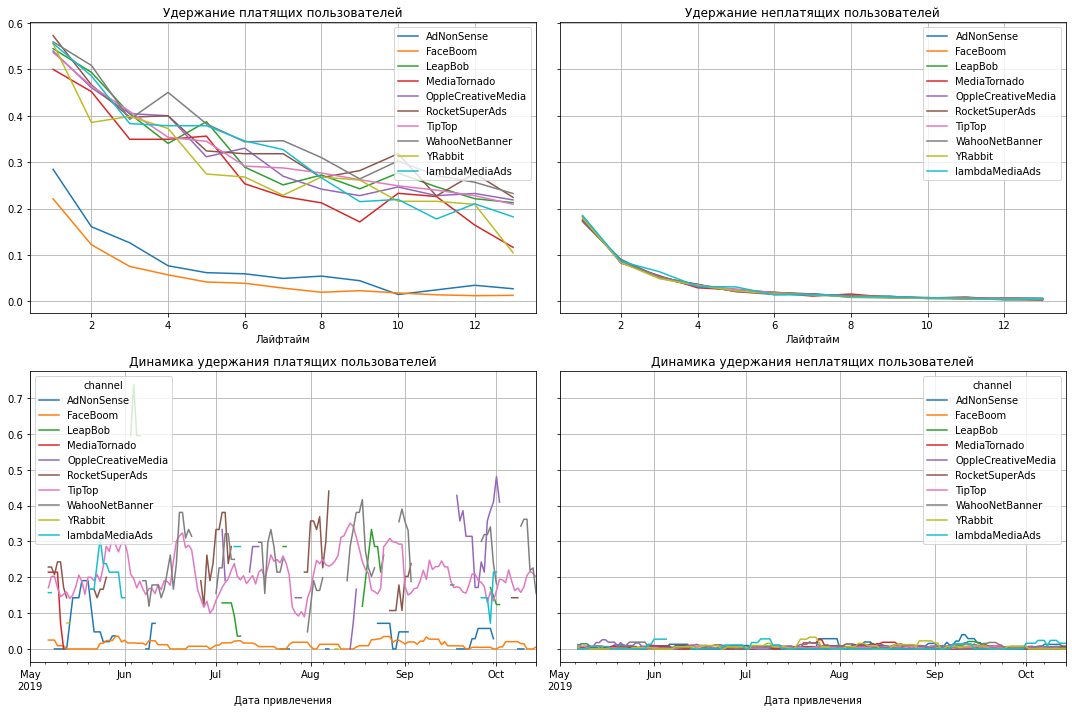

In [67]:
# смотрим удержание с разбивкой по каналам
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

График 1 - Удержание платящих пользователей:  видно, что удержание платящих пользователей падает на протяжении рассматриваемого периода для всех рекламных каналов. Самое низкое удержание отмечается для пользователей из рекламных каналов AdNonSense и FaceBoom, у остальных рекламных каналов удержание пользователей выше почти в два раза и находится примерно на одном уровне;

График 2 - Удержание неплатящих пользователей: видно, что удержание неплатящих пользоваетелей снижается на протяжении всего рассматриваемого периода для всех рекламных каналов;

График 3 - Динамика удержания платящих пользователей: в динамике видно, что удержание платящих пользователей снижается для пользователей из FaceBoom и является минимальным, самое высокое удержание платящих пользователей демонстриурет рекламный канал OppleCreativeMedia;

График 4 - Динамика удержания неплатящих пользователей:видно, что динамика удержания неплатящих пользоваетелей на протяжении всего рассматриваемого периода для всех рекламных каналов приблизительно одинаковая;

Вывод

1.Проанализировали окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI:

LTV: LTV вырастает на протяжении рассматриваемого периода
Динамика LTV: набольшее количество пользователей было привлечено с июня по июль
График 3 - Стоимость привлечения пользователей: стоимость привлечения пользователей увеличивается на протяжении всего рассматриваемого периода
График 4 - Уровень окупаемости ROI: видим, что с начала рассматриваемого периода уровень окупаемости повышается, но так и не доходит до полной окупаемости.
График 5 - Динамика окупаемости пользователей: Видим, что начиная с мая окупаемость начинает снижаться и окупаемость пользователей полностью падает в период с июня по июль.
    
2.Проанализировали окупаемость рекламы с разбивкой по устройствам:
    
LTV: видно, что наименьшую сумму денег приносят пользователи на устройстве PC , а наибольшую 
Mac и iphone;

Динамика  LTV : в динамике видно, что LTV пользователей на PC понижается на протяжении всего рассматриваемого периода, тогда как LTV пользователей на Mac, android возрастает. LTV пользователей iphone тоже понижалось, но все равно остается одним из самых высоких;

Стоимость привлечения пользователей:  видно, что стоимость привлечения пользоваталей на всех платформах возрастает,но стоит отметить, что стоимость привлечения пользователей на PC минимальная, а стоимость привлечения пользователей на mac и ipnone являются максимальными;

Уровень окупаемости ROI: окупаемость пользователей на android,mac и iphone не доходит до уровня окупаемости, до уровня окупаемости доходит только окупаемость пользователей на android;

График динамики окупаемости ROI: видно, что окупаемость для пользователей на всех платформах снижается на протяжении всего рассматриваемого периода;
    
3.Проанализировали окупаемость рекламы с разбивкой по странам:

LTV: видно, что на протяжении рассматриваемого периода LTV пользователей всех стран растет, самый большой рост наблюдается у пользователей из United States. Самый низкий LTV у пользователей из France, а самый высокий у пользователей из United States;

Динамика LTV : видно, что в динамике LTV у пользователей из Germany наблюдается повышение, а у пользователей из других стран наблюдается уменьшение;

Стоимость привлечения пользователей: видно, что стоимость привлечения пользователей из United States увеличилась, а стоимость привлечения пользователей из других стран - уменьшилась;

Уровень окупаемости ROI: видно, окупаемотсь для пользователей всех стран превышает уровень окупаемости, кроме окупаемости United States;

Динамика окупаемости пользователей: видно, что окупаемость пользователй из United States понижается на протяжении всего рассматриваемого периода, тогда как окупаемость пользователей из других стран повышается;

    
4.Проанализировали окупаемость рекламы с разбивкой по рекламным каналам: 
    
LTV: видно, что на протяжении рассматриваемого периода LTV для пользователей из канала lambdaMediaAds возрастает и является максимальной;

Динамика LTV : видно, что в динамике LTV для пользователей из канала lambdaMediaAds возрастает на протяжении всего рассматриваемого периода;

Стоимость привлечения пользователей: видно, что наибольшая стоимость привлечения пользователей из канала TipTop;

Уровень окупаемости ROI: окупаемость привлечения пользователей из большинства каналов превышает уровень окупаемости, кроме окупаемости пользователей из каналов TipTop, FaceBoom. AdNonSense;

Динамика окупаемости пользователей: видно, что у большинства каналов окупаемость имеет позитивную динамику, отдельно можно выделить канал YRabbit, где с июля по август наблюдается самый высокий пик роста;

5.Изучили конверсию в разрезе каналов рекламы, устройств и стран:

Наименьшая конверсия пользователей на PC И Android, а в динамике конверсии пользователей видим, значительное снижение конверсии пользоваетелй PC и Android на проятежнии всего рассматриваемого периода. Также, стоит отметить, что конверсия пользователей Mac возрастала, а пользователей iphone незначительно, но уменьшалась;

Cамая высокая конверсия у United States, а у остальных рассматриваемых странах конверсия приблизительно на одном уровне. В динамике конверсии пользовоателей видим, увеличение конверсии пользователей из United States и значительное снижение конверсии пользоваетелй из других рассматриваемых стран. Самое большое падение конверсии наблюдается для пользователей из France;

Самая высокая конверсия у канала FaceBoom и AdNonSenses, а у остальных рассматриваемых рекламных каналов конверсия заметно ниже. В динамике конверсии пользователей видим, увеличение конверсии по всем рекламным каналам в виде скачков в периоды с июня по июль, с августа по сентябрь и с сентября по октябрь. Возможно, в эти периоды запускалась рекламная кампания по всем рекламным каналам или, возможно, есть другие причины.


6. Проверили удержание пользователей:

6.1 Удержание пользователей на разных платформах:

Удержание платящих пользователей: видно, что удержание платящих пользователей падает на протяжении рассматриваемого периода. Стоит отметить, что снижение удержания пользователей PC наблюдается в виде резкого скачкообразного спада, также видно, что самое большое снижение происходит для пользователей Mac;

Удержание неплатящих пользователей: видно, что удержание неплатящих пользоваетелей снижается на протяжении всего рассматриваемого периода на всех устройствах;

Динамика удержания платящих пользователей: в динамике видно, что удержание платящих пользователей снижается для пользователей на PC. По всем платформам наблюдается увеличение удержания в виде скачков каждый месяц. Стоит отметить сильное снижение удержания пользователей на платформе Android в период с июня по июль;

Динамика удержания неплатящих пользователей: видно, что динамика удержания неплатящих пользоваетелей на протяжении всего рассматриваемого периода на всех устройствах приблизительно одинаковая;

6.2 Удержание пользователей в разных странах:

Удержание платящих пользователей:  видно, что удержание платящих пользователей падает на протяжении рассматриваемого периода для всех стран. Самое низкое удержание отмечается для пользователей из United States;

Удержание неплатящих пользователей: видно, что удержание неплатящих пользоваетелей снижается на протяжении всего рассматриваемого периода для всех стран;

Динамика удержания платящих пользователей: в динамике видно, что удержание платящих пользователей снижается для пользователей из United States. Можно отметить, что увеличивается удержание пользователей из других стран;

Динамика удержания неплатящих пользователей:видно, что динамика удержания неплатящих пользоваетелей на протяжении всего рассматриваемого периода для всех стран приблизительно одинаковая;

6.3 Удержание пользователей на разных рекламных каналах:

Удержание платящих пользователей:  видно, что удержание платящих пользователей падает на протяжении рассматриваемого периода для всех рекламных каналов. Самое низкое удержание отмечается для пользователей из рекламных каналов AdNonSense и FaceBoom, у остальных рекламных каналов удержание пользователей выше почти в два раза и находится примерно на одном уровне;

Удержание неплатящих пользователей: видно, что удержание неплатящих пользоваетелей снижается на протяжении всего рассматриваемого периода для всех рекламных каналов;

Динамика удержания платящих пользователей: в динамике видно, что удержание платящих пользователей снижается для пользователей из FaceBoom и является минимальным, самое высокое удержание платящих пользователей демонстриурет рекламный канал OppleCreativeMedia;

Динамика удержания неплатящих пользователей:видно, что динамика удержания неплатящих пользоваетелей на протяжении всего рассматриваемого периода для всех рекламных каналов приблизительно одинаковая;
    
Также, получили ответы на такие вопросы:

1.Окупается ли реклама, направленная на привлечение пользователей в целом?

В целом реклама окупается, но стоит отметить, что необходимо подробнее изучить и точечно изучить окупаемость пользователей из разных стран, рекламных каналов и с разными устройствами.

2.Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

Выявлено,что окупаемость пользователей на android,mac и iphone не доходит до уровня окупаемости, а также окупаемость пользоваетелей из United States не превышает уровень окупаемости, а также не окупается такие рекламные каналы как TipTop, FaceBoom. AdNonSense.;

3.Чем могут быть вызваны проблемы окупаемости?

Проблемы окупаемости могут быть связаны с низкой степенью доверия пользователей, непривлекательной рекламой, высокой стоимостью продукта (с учетом региональных особенностей), неактуальными предложениями, отказ от ремаркетинга и многое другое.

В случае с неокупаемостью United States стоит отметить, что окупаемость не превышает уровень окупаемости, т.к у пользователей из данной страны самое низкое удержание и самая низкая конверсия. Аналогичная ситуация с рекламным каналом FaceBoom.

Возможные причины обнаруженных проблем: высокая стоимость привлечения  пользователей, низкая эффективность рекламных каналов;

Рекомендации:

1. Снизить расходы на высокостоящие каналы или вовсе отказаться от них 

2. Повысить эффективность каналов


### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Подводя итоги, можно выделить возможные причины неэффективности привлечения пользователей:

   Необходимо обратить внимание на пользователей из United States, ведь там затраты на рекламные каналы не окупаются, что возможно из-за каких-то событий, т.к окупаемость снижается с июня по октябрь. Учитывая то, что рекламные каналы не окупаются, а стоимость привлечения пользователей в United States является самой высокой, необходимо разобраться с проблемой эффективности каналов.
    
   В процессе исследования, также, было выявлено, что окупаемость пользователей из каналов TipTop, FaceBoom. AdNonSense не превышает уровень окупаемости, но затраты на эти каналы являются высокими, а затраты на TipTop являются максимальными.
   
   Также, стоит выделить, что такие каналы как Yrabbit, MediaTornado, lambdaMediaAds приносят большое количество пользователей и превышают уровень окупаемости, поэтому в перспективе стоит обратить внимание на развитие данных каналов.
    
Рекомендации:

1. Подробно исследовать рекламные каналы в США, повысить эффективность каналов или сократить затраты на рекламные каналы в США.

2. Исследовать рекламные каналы с низкой окупаемостью, выявить конкретные причины проблем с окупаемостью и сократить затраты на данные каналы.